Predecir si las actividades extracurriculares de cada estudiante le ayudan psicologicamente o no

In [162]:
# Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Realizamos lectura del data set
data = pd.read_excel('data.xlsx') 

Para el analisis solo necesitaremos las siguentes columnas:
- ¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales)
- ¿Consideras que ha tenido un impacto en tu bienestar psicológico? Si la respuesta es sí, ¿consideras que fue un impacto positivo o negativo?
- ¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?
- ¿Ha influido dicha actividad en tu desarrollo acádemico? Si es así, ¿Influyó de manera Positiva o Negativa?
- ¿Te sientes una persona más activa desde que iniciaste la Actividad Extracurricular?

In [164]:
# Rescatamos solo las columnas de interes
data = data[['¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )', '¿Consideras que ha tenido un impacto en tu bienestar psicológico? Si la respuesta es sí, ¿consideras que fue un impacto positivo o negativo?', '¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?', '¿Ha influido dicha actividad en tu desarrollo acádemico? Si es así, ¿Influyó de manera Positiva o Negativa?', '¿Te sientes una persona más activa desde que iniciaste la Actividad Extracurricular?']]

Para mejorar la manipulacion de los datos, vamos a renombrar las columnas e identificar la variable que queremos predecir

- Horas = ¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )
- Dificultad = ¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?
- Influido = ¿Ha influido dicha actividad en tu desarrollo acádemico? Si es así, ¿Influyó de manera Positiva o Negativa?
- Activo = ¿Te sientes una persona más activa desde que iniciaste la Actividad Extracurricular?
- Impacto = ¿Consideras que ha tenido un impacto en tu bienestar psicológico? Si la respuesta es sí, ¿consideras que fue un impacto positivo o negativo?

La variable Impacto es la que queremos predecir


In [165]:
# Renombrar columnas con palabra clave
data = data.rename(columns={'¿Cuántas horas a la semana le dedicas a dicha actividad? (Incluyendo prácticas y eventos oficiales )':'Horas',
                     '¿Ha dificultado dicha actividad la forma en la que manejas tu tiempo?':'Dificultad',
                     '¿Ha influido dicha actividad en tu desarrollo acádemico? Si es así, ¿Influyó de manera Positiva o Negativa?':'Influido',
                     '¿Te sientes una persona más activa desde que iniciaste la Actividad Extracurricular?':'Activo',
                     '¿Consideras que ha tenido un impacto en tu bienestar psicológico? Si la respuesta es sí, ¿consideras que fue un impacto positivo o negativo?':'Impacto'})

data

,Horas,Impacto,Dificultad,Influido,Activo
0,10,1,3,1,1
1,10,1,3,0,1
2,7,1,3,0,1
3,4,1,2,1,1
4,3,1,3,1,1
...,...,...,...,...,...
202,8,1,3,0,1
203,7,1,4,-1,1
204,6,1,1,1,1
205,8,1,3,1,1


Para continuar con el modelo es necesario comprobar que las variables sean numericas y no tienen valores nulos

In [166]:
# Importante verificar que sean variables numericas.
print(f'Los datos tinees {data.isnull().sum().sum()} datos nulos \n\nY son de tipo:\n{data.dtypes}') 

Los datos tinees 0 datos nulos 

Y son de tipo:
Horas         int64
Impacto       int64
Dificultad    int64
Influido      int64
Activo        int64
dtype: object


Definimos los datos de prueba y entrenamiento, en este caso utilizamos el 30% de los datos como de prueba

In [167]:
from sklearn.model_selection import train_test_split

# aqui definimos los datos de entrenamiento y de prueba
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    data[['Horas', 'Dificultad', 'Influido', 'Activo']],
    data['Impacto'], 
    test_size=0.30)

Creamos el modelo de arbol de decición

In [168]:
from sklearn import tree

# definimos que el criterio de decicion sea en base a la entropia y definimos 4 'ramas' para el modelo de arbol
arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4) 

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy,'\n\n')

print(tree.export_text(arbol,
                      feature_names=['Horas', 'Dificultad', 'Influido', 'Activo']))

0.8095238095238095 


|--- Dificultad <= 3.50
|   |--- Dificultad <= 2.50
|   |   |--- Horas <= 4.50
|   |   |   |--- Activo <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Activo >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Horas >  4.50
|   |   |   |--- Influido <= -0.50
|   |   |   |   |--- class: -1
|   |   |   |--- Influido >  -0.50
|   |   |   |   |--- class: 1
|   |--- Dificultad >  2.50
|   |   |--- Influido <= 0.50
|   |   |   |--- Activo <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Activo >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Influido >  0.50
|   |   |   |--- class: 1
|--- Dificultad >  3.50
|   |--- Dificultad <= 4.50
|   |   |--- Influido <= -0.50
|   |   |   |--- Horas <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- Horas >  6.50
|   |   |   |   |--- class: 1
|   |   |--- Influido >  -0.50
|   |   |   |--- Horas <= 11.50
|   |   |   |   |--- class: 1
|   |   |   |--- Horas >  11.50
|   |   |   |   |--- class: -1
|   |--- Dificulta

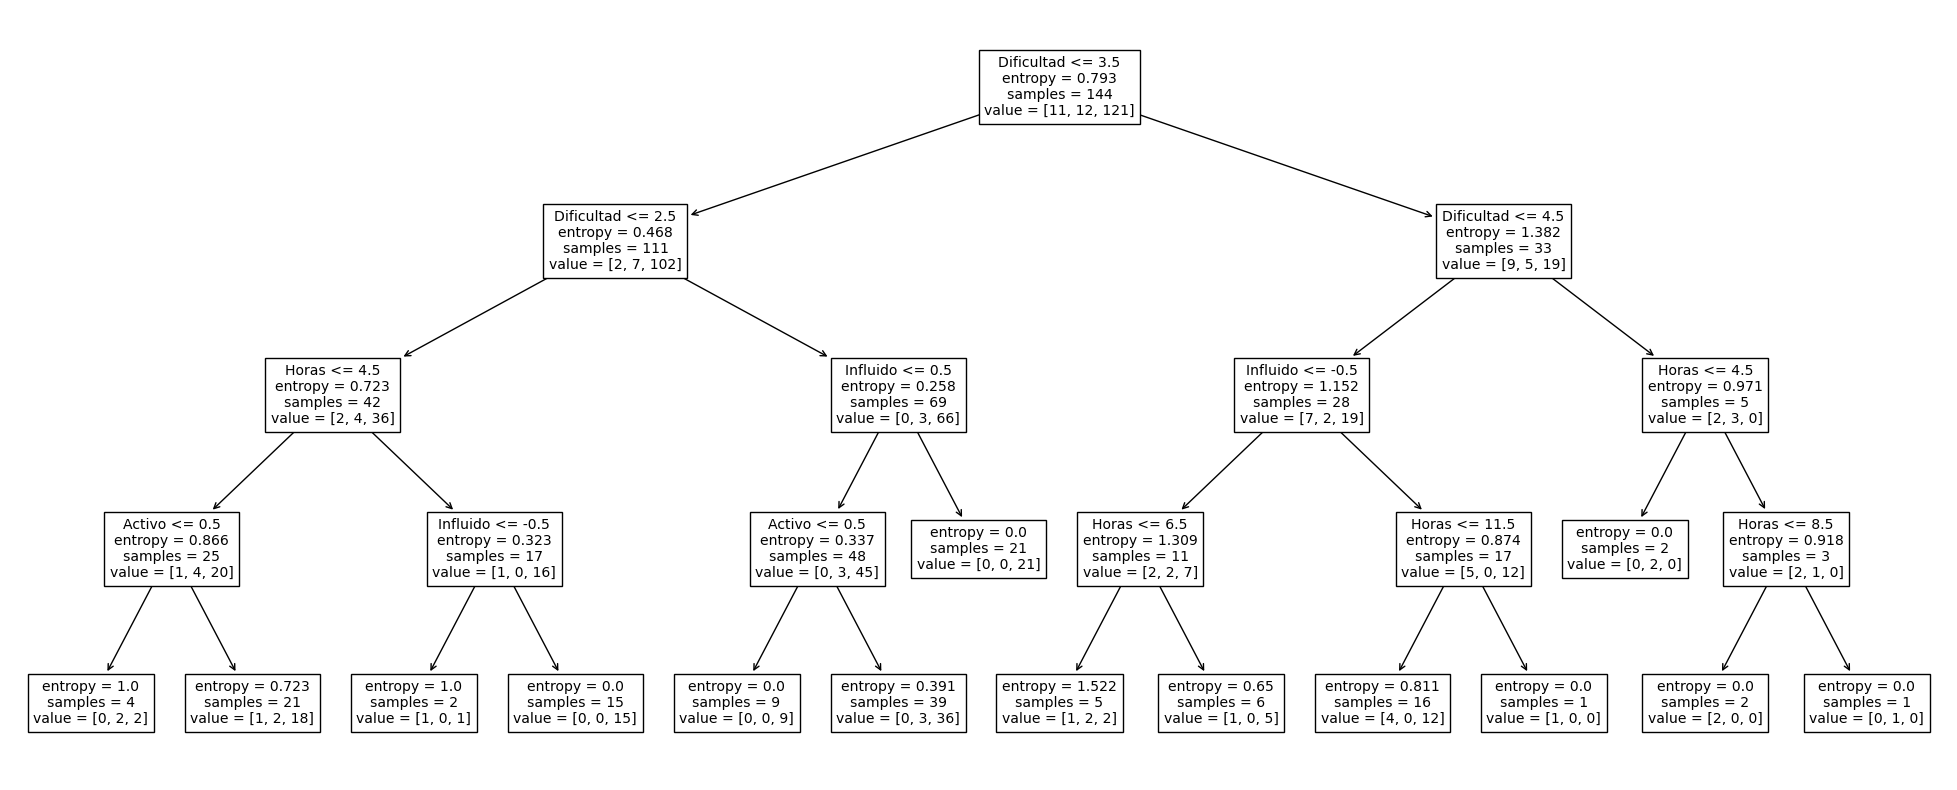

In [169]:
plt.figure(figsize=(25, 10))
tree.plot_tree(arbol, 
              feature_names=['Horas', 'Dificultad', 'Influido', 'Activo'])
plt.show()

Creamos una funcion para imprimir de manera textual el significado de las variables.

In [171]:
def estudiante(h,d,i,a):

    if d < 2:
        dt='NADA'
    elif d < 3:
        dt='MUY POCO'
    elif d < 4:
        dt='POCO'
    elif d < 5:
        dt='MUHCO'
    else:
        dt='BASTANTE'


    if i < 0:
        it='NEGATIVA'
    elif i == 0:
        it='NULA'
    else:
        it='POSITIVA'

    if a < 1:
        at='MENOS'
    else:
        at='MAS'

    predic = arbol_decision.predict([[h,d,i,a]])

    if predic == 1:
        pt = 'POSITIVAMENTE'
    elif predic == 0:
        pt = 'NULA'
    else:
        pt='NEGATIVA'

    print(f'Un estudiante que:')
    print(f'Le dedica {h} horas a la semana')
    print(f'Le quita {dt} tiempo')
    print(f'Le influye de manera {it} a su desarrollo academico')
    print(f'Se siente {at} activo haceidno las actividades\n')
    print(f'A este estudiante le a influido de manera {pt} en lo psicologico\n\n')



Realizamos 3 predicicones

In [180]:
# Estudiante que le dedica
h = 12   # 12 horas a la semana 
d = 4   # Considera que le quita mucho tiempo
i = 0  # Le a influido de manera negativa a su desarrollo academico
a = 0   # No se siente mas activo haceindo estas actividades

estudiante(h,d,i,a)

# Estudiante que le dedica
h = 2   # 2 horas a la semana 
d = 5   # Considera que le quita poco tiempo
i = -1  # Le a influido de manera negativa a su desarrollo academico
a = 1   # SI se siente mas activo haceindo estas actividades

estudiante(h,d,i,a)

# Estudiante que le dedica
h = 5   # 5 horas a la semana 
d = 1   # Considera que le quita poco tiempo
i = 1  # Le a influido de manera negativa a su desarrollo academico
a = 1   # SI se siente mas activo haceindo estas actividades

estudiante(h,d,i,a)

Un estudiante que:
Le dedica 12 horas a la semana
Le quita MUHCO tiempo
Le influye de manera NULA a su desarrollo academico
Se siente MENOS activo haceidno las actividades

A este estudiante le a influido de manera NEGATIVA en lo psicologico


Un estudiante que:
Le dedica 2 horas a la semana
Le quita BASTANTE tiempo
Le influye de manera NEGATIVA a su desarrollo academico
Se siente MAS activo haceidno las actividades

A este estudiante le a influido de manera NULA en lo psicologico


Un estudiante que:
Le dedica 5 horas a la semana
Le quita NADA tiempo
Le influye de manera POSITIVA a su desarrollo academico
Se siente MAS activo haceidno las actividades

A este estudiante le a influido de manera POSITIVAMENTE en lo psicologico




c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
